In [29]:
# Imports Pandas, Requests, MatplotLib, and BeautifulSoup libraries 
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# requests to get the contents of the url using get function in Requests
url = "https://en.wikipedia.org/wiki/Len_Wickwar"
response = requests.get(url)

# Uses Python's html.parser
soup = BeautifulSoup(response.text, 'html.parser')

# finds all instances of a wikitable in the url
wickwar_table=soup.find_all('table',{'class':"wikitable"})

# gets the second wikitable that contains a list of fights
fight_record = pd.read_html(str(wickwar_table[1]))

# puts the content into a dataframe fight_record
fight_record = pd.DataFrame(fight_record[0])

# saves a copy of the raw data
fight_record.to_csv("wickwar_raw_data.csv")

# displays the first five rows of fight_record
(fight_record.head())

,No.,Result,Record,Opponent,Type,Round,Date,Location,Notes
0,473,Loss,342–86–43 (2),Danny Cunningham,KO,5 (8),"Feb 6, 1947","New St James Hall, Newcastle, Tyne and Wear, E...",NaN
1,472,Win,342–85–43 (2),Stan Hibbert,PTS,8,"Dec 9, 1946","Granby Halls, Leicester, Leicestershire, England",NaN
2,471,Win,341–85–43 (2),Ralph Moss,PTS,8,"Dec 2, 1946","Granby Halls, Leicester, Leicestershire, England",NaN
3,470,Win,340–85–43 (2),Mick Gibbons,RTD,5 (10),"Nov 11, 1946","Cossington Street Baths, Leicester, Leicesters...",NaN
4,469,Win,339–85–43 (2),Ginger Ward,PTS,10,"Jun 10, 1940","Skating Rink, Nuneaton, Warwickshire, England",NaN


In [30]:
# Drop Notes, Round, and Location columns as it is not necessary
fight_record = fight_record.drop(columns = ['Notes', 'Round', 'Location', 'Record'])
fight_record

,No.,Result,Opponent,Type,Date
0,473,Loss,Danny Cunningham,KO,"Feb 6, 1947"
1,472,Win,Stan Hibbert,PTS,"Dec 9, 1946"
2,471,Win,Ralph Moss,PTS,"Dec 2, 1946"
3,470,Win,Mick Gibbons,RTD,"Nov 11, 1946"
4,469,Win,Ginger Ward,PTS,"Jun 10, 1940"
...,...,...,...,...,...
468,5,Win,Harry Siddons,PTS,"Dec 7, 1928"
469,4,Win,Bobby Wood,PTS,"Nov 26, 1928"
470,3,Loss,Norman Snow,PTS,"Nov 19, 1928"
471,2,Win,Tommy Cann,PTS,"Nov 13, 1928"


In [31]:
# creates a list that contain the year that the fight happened
year = []

# goes through the dataframe, uses a comma to split the data
for i in range(len(fight_record)):
    split_date = (fight_record['Date'].iloc[i].split(", "))
    
    # gets the second element after the split: the year
    year.append(split_date[1])
# creates a new column in fight_record called Year with values of list year
fight_record['Year'] = year

# drop the date column from fight_record
fight_record = fight_record.drop(columns = 'Date')

# sort the fights in chronological order
fight_record = fight_record.sort_values(by=['No.'])
fight_record

,No.,Result,Opponent,Type,Year
472,1,Win,Jim Young Shepherdson,KO,1928
471,2,Win,Tommy Cann,PTS,1928
470,3,Loss,Norman Snow,PTS,1928
469,4,Win,Bobby Wood,PTS,1928
468,5,Win,Harry Siddons,PTS,1928
...,...,...,...,...,...
4,469,Win,Ginger Ward,PTS,1940
3,470,Win,Mick Gibbons,RTD,1946
2,471,Win,Ralph Moss,PTS,1946
1,472,Win,Stan Hibbert,PTS,1946


In [32]:
# One-hot encodes the Result column in fight_record, saves to new dataframe fight_df
fight_df = pd.get_dummies(fight_record,columns=['Result'])
fight_df

,No.,Opponent,Type,Year,Result_Draw,Result_Loss,Result_NC,Result_Win
472,1,Jim Young Shepherdson,KO,1928,0,0,0,1
471,2,Tommy Cann,PTS,1928,0,0,0,1
470,3,Norman Snow,PTS,1928,0,1,0,0
469,4,Bobby Wood,PTS,1928,0,0,0,1
468,5,Harry Siddons,PTS,1928,0,0,0,1
...,...,...,...,...,...,...,...,...
4,469,Ginger Ward,PTS,1940,0,0,0,1
3,470,Mick Gibbons,RTD,1946,0,0,0,1
2,471,Ralph Moss,PTS,1946,0,0,0,1
1,472,Stan Hibbert,PTS,1946,0,0,0,1


In [33]:
# gets the unique values of years that Wickwar fought into list years
years = fight_df.Year.unique()

fight_count = 0
wins_by_year = []
wins_count = 0

# goes through all of the years, and through all the elements of fight_df
for year_i in range(len(years)):
    for i in range(len(fight_df)):
        # increases fight_count if year matches
        if fight_df['Year'].iloc[i] == years[year_i]:
            fight_count += 1
            
            # increases win count by value of Result_Win (one-hot encoding)
            wins_count += fight_df['Result_Win'].iloc[i]
    # adds the percentage of fights won to the wins_by_year list
    wins_by_year.append(100 * wins_count / fight_count)  
    
    # resets the counter of wins and fights for the next iteration of for loop
    wins_count = 0
    fight_count = 0

Text(0.5, 1.0, "Len Wickwar's Boxing Win Percentage By Year")

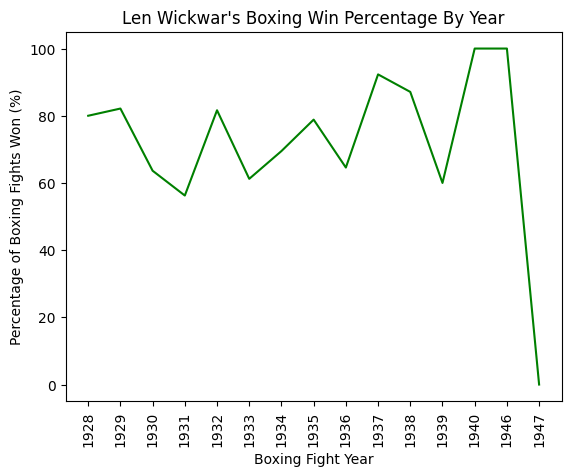

In [34]:
# plots years as the x-axis and wins_by_year as the y-axis
plt.plot(years, wins_by_year, color = 'green')
plt.xticks(rotation=90)

# Labels the axis and title 
plt.xlabel('Boxing Fight Year')
plt.ylabel('Percentage of Boxing Fights Won (%)')
plt.title("Len Wickwar's Boxing Win Percentage By Year")